In [186]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
np.set_printoptions(suppress=True, precision = 2)

<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x0000027E9E0EB1A0> at 0x0000027EC9D4DE40>

In [188]:
nba = pd.read_csv('./nba_games.csv')


In [189]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [190]:
nba_2010

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13
...,...,...,...,...,...,...,...,...,...,...,...
22162,201006080BOS,2010,Celtics,Lakers,H,1,84,91,L,0.642039,-7
22163,201006100BOS,2010,Celtics,Lakers,H,1,96,89,W,0.610370,7
22164,201006130BOS,2010,Celtics,Lakers,H,1,92,86,W,0.627127,6
22165,201006150LAL,2010,Celtics,Lakers,A,1,67,89,L,0.361360,-22


## compare the knicks to the nets with respect to points earned per game

### 2010

In [191]:
# 2010
knicks_pts_10 = nba_2010.pts[nba_2010['fran_id']=='Knicks']
nets_pts_10  = nba_2010.pts[nba_2010['fran_id']=='Nets']

In [192]:
diff_means_2010 = abs(knicks_pts_10.mean()-nets_pts_10.mean())
print(diff_means_2010)

9.731707317073173


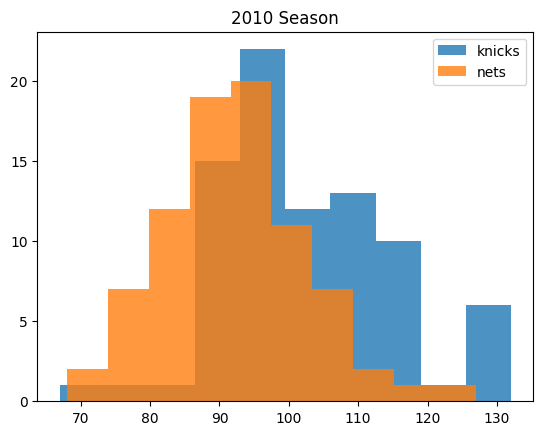

In [193]:
plt.hist(knicks_pts_10,alpha=0.8 , label='knicks',)
plt.hist(nets_pts_10, alpha = 0.8,label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()

### 2014

In [194]:
# 2014
knicks_pts_14 = nba_2014.pts[nba_2014['fran_id']=='Knicks']
nets_pts_14  = nba_2014.pts[nba_2014['fran_id']=='Nets']

In [195]:
diff_means_2014 = abs(knicks_pts_14.mean()-nets_pts_14.mean())
print(diff_means_2014)

0.44706798131809933


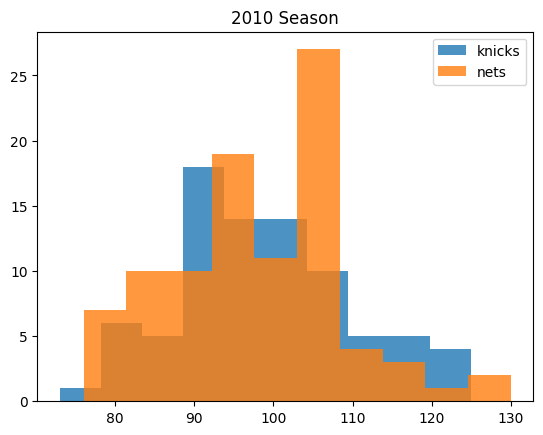

In [196]:
plt.hist(knicks_pts_14,alpha=0.8 , label='knicks',)
plt.hist(nets_pts_14, alpha = 0.8,label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()

Remainder

In [197]:
fran_ids= nba_2010.fran_id.unique()

In [198]:
print(fran_ids)

['Celtics' 'Knicks' 'Nets' 'Thunder' 'Spurs']


<Axes: xlabel='fran_id', ylabel='pts'>

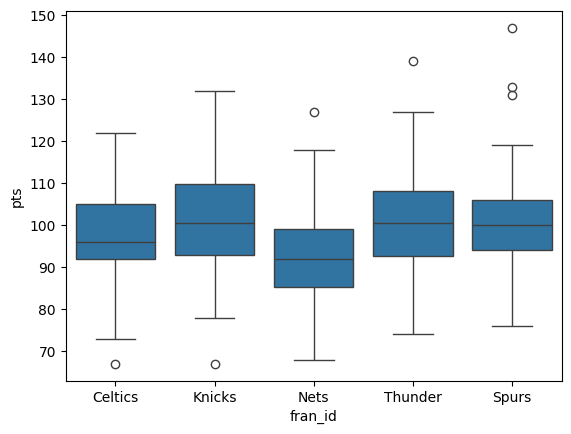

In [199]:
sns.boxplot(nba_2010, y= nba_2010.pts , x= nba_2010.fran_id)

## Analyzing relationships between Categorical variables


###  if teams tend to win more games at home compared to away

In [200]:
location_result_freq  = pd.crosstab(nba_2010.game_result, nba_2010.game_location);
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


In [201]:
location_result_proportions = (location_result_freq/len(nba_2010))*100
location_result_proportions

game_location,A,H
game_result,,
L,29.555556,23.333333
W,20.444444,26.666667


In [202]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


## Analyzing Relationships Between Quantitative Variables


In [203]:
point_diff_forecast_cov = np.cov(nba_2010.forecast ,nba_2010.point_diff )
point_diff_forecast_cov

array([[  0.05,   1.37],
       [  1.37, 186.56]])

In [204]:
point_diff_forecast_corr,p_value = pearsonr(nba_2010.forecast ,nba_2010.point_diff)
print(point_diff_forecast_corr)

0.4402088708468082


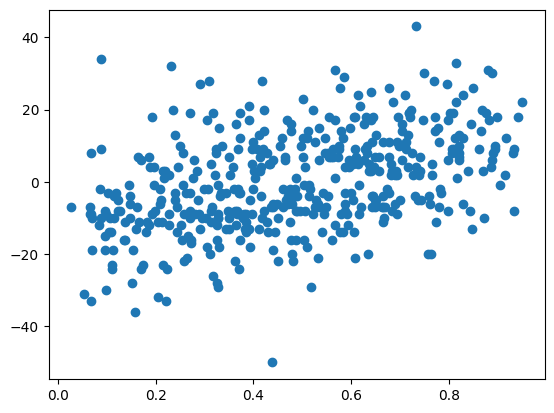

In [205]:
plt.scatter(nba_2010.forecast,nba_2010.point_diff)